Visual exploration of bivariate normal distributions and how eigenvectors of the covariance matrix relate (they describe directions of maximum and minimum variance!).

See [Chapter 10 of Math for Finance](https://www.softcover.io/read/bf34ea25/math_for_finance/joint_distributions) for more discussion.

We'll start by graphing the probability density function for a bivariate normal distribution. You can play with the mean vector and the covariance matrix.

In [1]:
import numpy as np
from scipy.stats import multivariate_normal as mvn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
# 2 dimensional XY space. Meshgrid makes a grid of x, y values, then dstack combines them into columns
N=100
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(x, y)
position = np.dstack((X,Y))

In [3]:
# mu is the mean vector and Sigma is the covariance matrix
mu = np.array([.1,1])
Sigma = np.array([[1,.3],[.3,2]])

In [4]:
# Note that both numpy and scipy have a multivariate_normal method, and they are different. 
# I imported the scipy.stats multivariate normal as mvn.
F = mvn(mu, Sigma)
# then I use the pdf function and evaluate it on the positions.
Z = F.pdf(position)

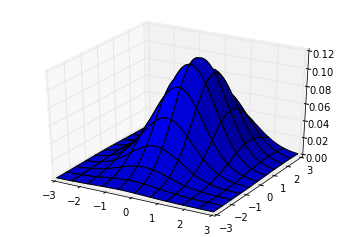

In [5]:
# Now try plotting this probability density function:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)


<matplotlib.contour.QuadContourSet instance at 0x111caf7a0>

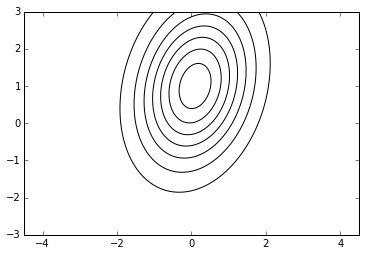

In [6]:
# Let's look at the contour plots of this probability density function:
ax = plt.gca()
ax.axis('equal')
ax.contour(X, Y, Z, colors='black')
# boring!

<matplotlib.colorbar.Colorbar instance at 0x112a83248>

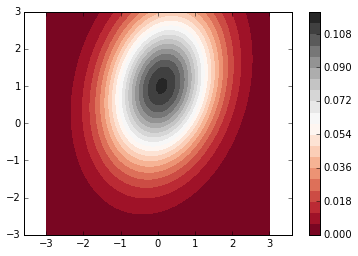

In [8]:
ax = plt.gca()
ax.axis('equal')
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar();
# more exciting! and I made a point of equalizing axes here.


In [11]:
# I'm going to compute the eigenvalues and eigenvectors of the covariance matrix Sigma
eival,eivec = np.linalg.eig(Sigma)

<matplotlib.contour.QuadContourSet instance at 0x112cb1e60>

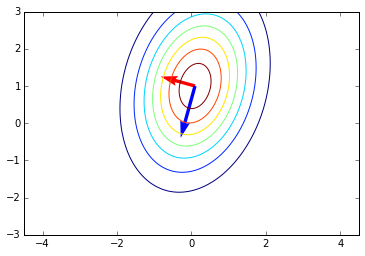

In [12]:
# Add scaled eigenvectors to the contour plot. Notice 
# (1) I'm scaling by the sqrt of the associated eigenvalue, and
# (2) the ends of both scaled eigenvectors are on the same contour line.
# You can see, then, that the smaller eigenvalue of Sigma correpsonds to the direction of smaller variance, 
# and the larger eigenvalue corresponds to the direction of larger variance. 
ax = plt.gca()
ax.axis('equal')
ax.quiver(mu[0],mu[1],np.sqrt(eival[0])*eivec[0,0],np.sqrt(eival[0])*eivec[1,0], width=0.01, color='r',angles='xy', scale_units='xy', scale=1)
ax.quiver(mu[0],mu[1],np.sqrt(eival[1])*eivec[0,1],np.sqrt(eival[1])*eivec[1,1], width=0.01, color='b',angles='xy', scale_units='xy', scale=1)
plt.contour(X,Y,Z)

It's worth clarifying here that everything I've done above has been "slices" of the bivariate normal pdf $f(x,y)$.

None of the ellipses above are from the quadratic form $x^T \Sigma x$. 

Let's look at $x^T \Sigma x$.

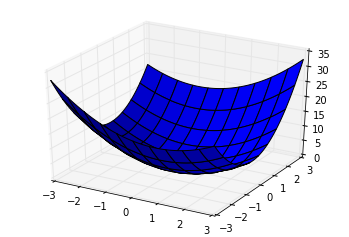

In [34]:
# Here I'm using Einstein summation notation for the quadratic form, combining it with Python's ... so that 
# I can use the meshgrid/position I defined earlier.
def quad_form(x,a):
    return np.einsum('...j,jk,...k->...',x,a,x)
   

Z=quad_form(position,Sigma)

# Now try plotting it in three dimensions!
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)

<matplotlib.contour.QuadContourSet instance at 0x1137a7758>

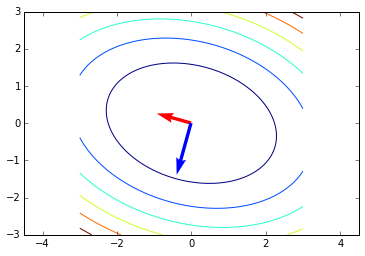

In [42]:
# Check out the contour plot. First, I'll put in the eigenvectors scaled by sqrt(eigenvalues)
# Look how wrong it is!! even though (eigenvalue) is the correct eigenvalue for Sigma, 
# and we're plotting x^T Sigma x.

ax = plt.gca()
ax.axis('equal')
ax.quiver(0,0,np.sqrt(eival[0])*eivec[0,0],np.sqrt(eival[0])*eivec[1,0], width=0.01, color='r',angles='xy', scale_units='xy', scale=1)
ax.quiver(0,0,np.sqrt(eival[1])*eivec[0,1],np.sqrt(eival[1])*eivec[1,1], width=0.01, color='b',angles='xy', scale_units='xy', scale=1)
plt.contour(X,Y,Z)

<matplotlib.contour.QuadContourSet instance at 0x1138dd0e0>

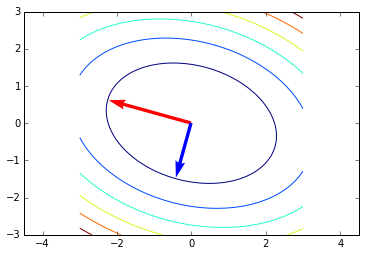

In [43]:
# Now let's scale by 1/eigenvalue -- or rather, 2.2 times that because it makes the picture look better.
ax = plt.gca()
ax.axis('equal')
ax.quiver(0,0,2.2/np.sqrt(eival[0])*eivec[0,0],2.2/np.sqrt(eival[0])*eivec[1,0], width=0.01, color='r',angles='xy', scale_units='xy', scale=1)
ax.quiver(0,0,2.2/np.sqrt(eival[1])*eivec[0,1],2.2/np.sqrt(eival[1])*eivec[1,1], width=0.01, color='b',angles='xy', scale_units='xy', scale=1)
plt.contour(X,Y,Z)

### Pedagogical interlude for financial purposes

What happens if you've got a bunch of random variables with a joint normal distribution, but some of the random variables turn out to be correlated with some of the others? Then the covariance matrix is singular. What happens to the bivariate pdf?


In [48]:
# For example, 
# mu is the mean vector and Sigma is the covariance matrix
mu = np.array([.1,1])
singular_Sigma = np.array([[1,2],[2,4]])

In [51]:
# Find the eigenvalues and eigenvectors again
eival,eivec = np.linalg.eig(singular_Sigma)
eival

array([ 0.,  5.])

In [49]:
# Try running this: 
F = mvn(mu, singular_Sigma)
# What do you get?

LinAlgError: singular matrix

Let's look at the graph for the quadratic form $x^T \Sigma x$, then, and see what happens. I'll include the eigenvectors (unit length):

<matplotlib.contour.QuadContourSet instance at 0x113ebc9e0>

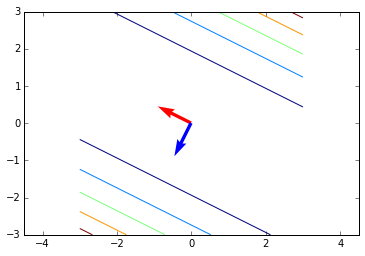

In [55]:
Z=quad_form(position,singular_Sigma)
ax = plt.gca()
ax.axis('equal')
ax.quiver(0,0,eivec[0,0],eivec[1,0], width=0.01, color='r',angles='xy', scale_units='xy', scale=1)
ax.quiver(0,0,eivec[0,1],eivec[1,1], width=0.01, color='b',angles='xy', scale_units='xy', scale=1)
plt.contour(X,Y,Z)

<matplotlib.contour.QuadContourSet instance at 0x11433af38>

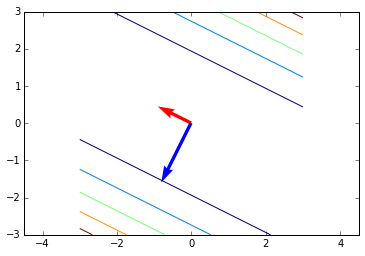

In [59]:
# Here I'll scale the blue eigenvector (corresponding to eigenvalue 5). 
# By how much will I need to scale the red vector to reach the end of the ellipse?
# (what ellipse?!)
ax = plt.gca()
ax.axis('equal')
ax.quiver(0,0,eivec[0,0],eivec[1,0], width=0.01, color='r',angles='xy', scale_units='xy', scale=1)
ax.quiver(0,0,4/np.sqrt(eival[1])*eivec[0,1],4/np.sqrt(eival[1])*eivec[1,1], width=0.01, color='b',angles='xy', scale_units='xy', scale=1)
plt.contour(X,Y,Z)

Since you can't invert $\Sigma$ you can't actually make the bivariate normal distribution. You will have to do dimension reduction on your data to find an appropriate distribution.